In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [66]:
def classificator (dataset, classifier):
    accuracy_dict={}
    x_data=dataset.drop(columns=[classifier])
    y_data=dataset.loc[:,classifier]
    x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.25,random_state=10)


    # RandomForestClassifier 
    rf_model = RandomForestClassifier(n_estimators=1000, random_state=20)
    rf_model.fit(x_train, y_train)

    y_pred = rf_model.predict(x_test)

    # Valutazione delle prestazioni del modello
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuratezza del modello RandomForestClassifier: %.3f" %accuracy)
    accuracy_dict['RandomForest']=round(accuracy,3)

    # Classificatore SVM con solo relevant feature
    svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

    svm_classifier.fit(x_train, y_train)
    y_pred = svm_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuratezza del classificatore SVM: %.3f" %accuracy)
    accuracy_dict['SVM']=round(accuracy,3)

    # Crea il modello di regressione logistica con solo relevant
    logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, random_state=42)

    logistic_regression.fit(x_train, y_train)
    y_pred = logistic_regression.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuratezza del modello di regressione logistica:", accuracy)
    accuracy_dict['Regression']=accuracy

    # DecisionTreeClassifier con tutte le feature
    tree_classifier = DecisionTreeClassifier(random_state=42)

    tree_classifier.fit(x_train, y_train)
    y_pred = tree_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuratezza del classificatore ad albero decisionale: %.3f" %accuracy)
    accuracy_dict['Tree']=round(accuracy,3)


    # Classificatore naive bayes con relevant feature
    naive_bayes_classifier = GaussianNB()
    naive_bayes_classifier.fit(x_train, y_train)

    y_pred = naive_bayes_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuratezza del classificatore Naive Bayes: %.3f" %accuracy)
    accuracy_dict['Bayes']=round(accuracy,3)

    return accuracy_dict


In [67]:
def remove_outliers(df):

    df_clean = df.copy()  # Copia il DataFrame originale per non modificarlo direttamente

    for col in df.columns:
        if col != 'quality':
            q1 = df[col].quantile(0.25)  # Calcola il primo quartile
            q3 = df[col].quantile(0.75)  # Calcola il terzo quartile
            iqr = q3 - q1  # Calcola l'interquartile range (IQR)

            # Calcola i limiti per gli outlier
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Rimuovi gli outlier
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

In [68]:
def replace_outliers_with_median(df):
    df_clean = df.copy()  # Copia il DataFrame originale per non modificarlo direttamente

    for col in df.columns:
        if col != 'quality':
            q1 = df[col].quantile(0.25)  # Calcola il primo quartile
            q3 = df[col].quantile(0.75)  # Calcola il terzo quartile
            iqr = q3 - q1  # Calcola l'interquartile range (IQR)

            # Calcola i limiti per gli outlier
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Sostituisci gli outlier con la mediana
            median = df_clean[col].median()
            df_clean[col] = df_clean[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df_clean


In [69]:
def plot_boxplots(dataframe):
    num_plots = len(dataframe.columns) - 1  # Numero di colonne nel DataFrame escludendo "quality"
    cols_per_row = 4 

    # Calcola il numero di righe necessarie
    num_rows = (num_plots - 1) // cols_per_row + 1

    # Crea il layout dei subplot
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

    # Flatten l'array di assi se è multidimensionale
    axes = axes.flatten()

    # Itera sulle colonne del DataFrame escludendo "quality"
    for i, col in enumerate(dataframe.drop(columns='quality')):
        # Seleziona l'asse corrente
        ax = axes[i]

        # Disegna il boxplot per la feature corrente con "quality" sulle x
        sns.boxplot(x='quality', y=col, data=dataframe, ax=ax)

        # Imposta il titolo del boxplot
        ax.set_title(f'Boxplot di {col}')

        # Ruota le etichette sull'asse x per una migliore leggibilità
        ax.tick_params(axis='x', rotation=45)

        # Imposta le etichette sull'asse y con precisione a tre cifre decimali
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))

    # Rimuovi gli assi vuoti se ce ne sono
    for ax in axes[num_plots:]:
        ax.remove()

    # Imposta il layout dei subplot
    plt.tight_layout()

    # Mostra il grafico
    plt.show()


In [70]:
def plot_boxplots_comparision(dataframe_1, dataframe_clean_1):
    dataframe=dataframe_1.copy()
    dataframe_clean=dataframe_clean_1.copy()
    num_plots = len(dataframe.columns) - 1 # Numero di colonne nel DataFrame escludendo "quality" e Dataset
    cols_per_row = 4 

    # Calcola il numero di righe necessarie
    num_rows = (num_plots - 1) // cols_per_row + 1

    # Crea il layout dei subplot
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

    # Flatten l'array di assi se è multidimensionale
    axes = axes.flatten()

    # Concateniamo i DataFrame relevant e relevant_clean, aggiungendo una colonna 'Dataset' per distinguere tra i due
    dataframe['Dataset'] = 'Prima'
    dataframe_clean['Dataset'] = 'Dopo'

    # Uniamo i DataFrame
    combined_df = pd.concat([dataframe, dataframe_clean])

    # Iteriamo su ogni feature
    for i, col in enumerate(dataframe.columns):
        if col != 'quality' and col != 'Dataset':
            ax = axes[i]
            sns.boxplot(x='Dataset', y=col, data=combined_df, hue='Dataset', palette=["blue", "orange"], ax=ax)
            ax.set_title(f'Rimozione Outlier di {col}')
            
    # Rimuovi gli assi vuoti se ce ne sono
    for ax in axes[num_plots:]:
        ax.remove()

    # Imposta il layout dei subplot
    plt.tight_layout()
    plt.show()

In [71]:
def plot_bar_chart(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    colors = plt.cm.RdBu(np.array(values) / max(values))  # Utilizza la mappa di colori "RdBu" in base ai valori massimi

    #Aggiungi valori sulle barplot
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')
    
    plt.bar(keys, values, color=colors)
    plt.xlabel('Chiavi')
    plt.ylabel('Valori')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, max(values) * 1.2)  # Estendi l'asse y del 10%
    plt.show()

In [72]:
def new_quality_value(df):
    
    new_df = df.copy()
    # Mappa i valori della colonna 'quality' 
    quality_mapping = {3: 0, 4: 0, 5: 1, 6: 1, 7: 2, 8: 2}
    new_df['quality'] = new_df['quality'].replace(quality_mapping)
    
    return new_df


In [73]:
wine_dataframe = pd.read_csv('restore_winedata.csv')
data=wine_dataframe.copy()
data.shape

(1599, 12)

In [74]:
data_clean=replace_outliers_with_median(data)
data_clean.shape

(1599, 12)

In [75]:
relevant=wine_dataframe.drop(columns=['fixed_acidity','residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH'])
relevant_clean=replace_outliers_with_median(relevant)
relevant_clean.shape

(1599, 5)

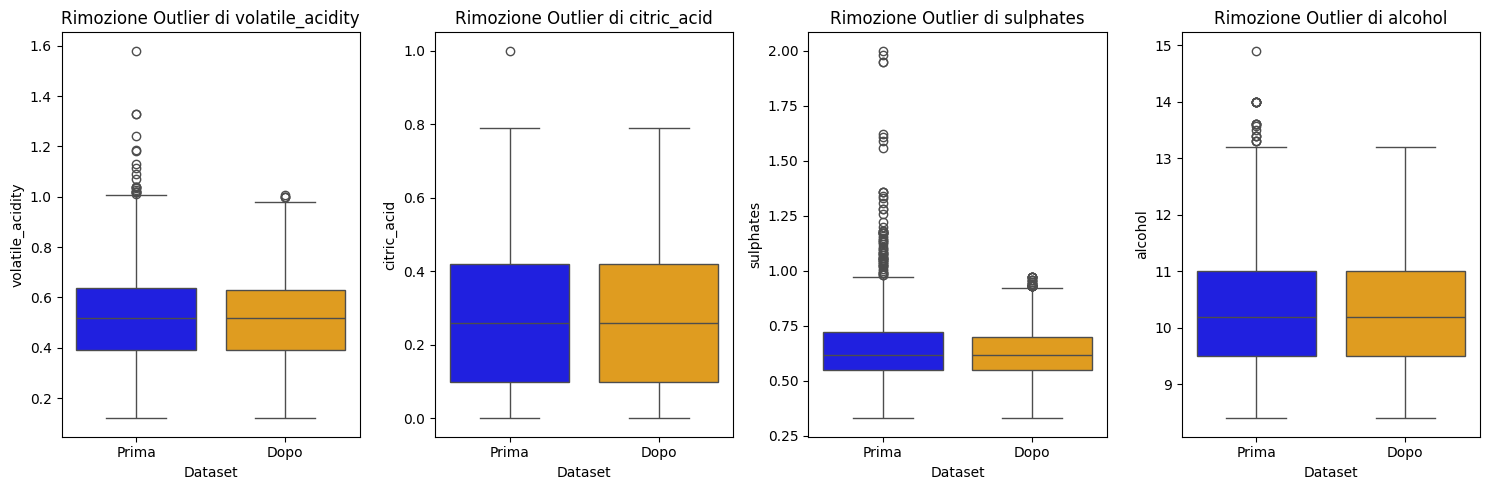

In [76]:
plot_boxplots_comparision(relevant,relevant_clean)

Accuratezza del modello RandomForestClassifier: 0.665
Accuratezza del classificatore SVM: 0.430
Accuratezza del modello di regressione logistica: 0.5575
Accuratezza del classificatore ad albero decisionale: 0.537
Accuratezza del classificatore Naive Bayes: 0.537


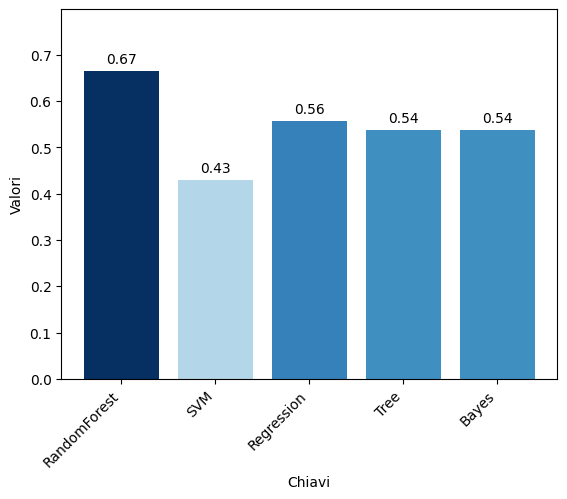

In [77]:
result_all=classificator(data_clean,'quality')
plot_bar_chart(result_all)


Accuratezza del modello RandomForestClassifier: 0.620
Accuratezza del classificatore SVM: 0.537
Accuratezza del modello di regressione logistica: 0.5425
Accuratezza del classificatore ad albero decisionale: 0.547
Accuratezza del classificatore Naive Bayes: 0.555


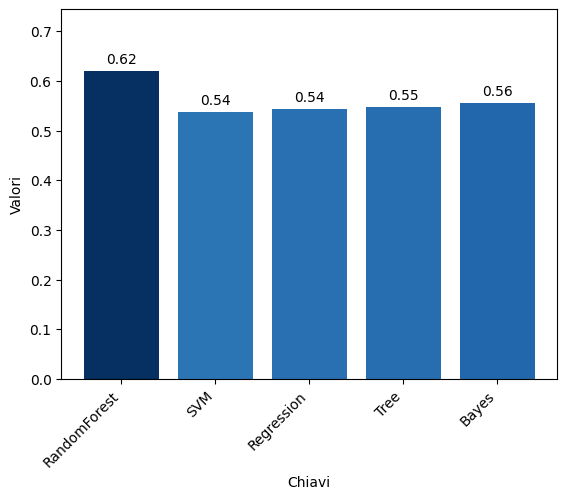

In [78]:
result_relevant=classificator(relevant_clean, 'quality')
plot_bar_chart(result_relevant)

In [79]:
data_clean_remove=remove_outliers(data)
print(data_clean_remove.shape)

(1188, 12)


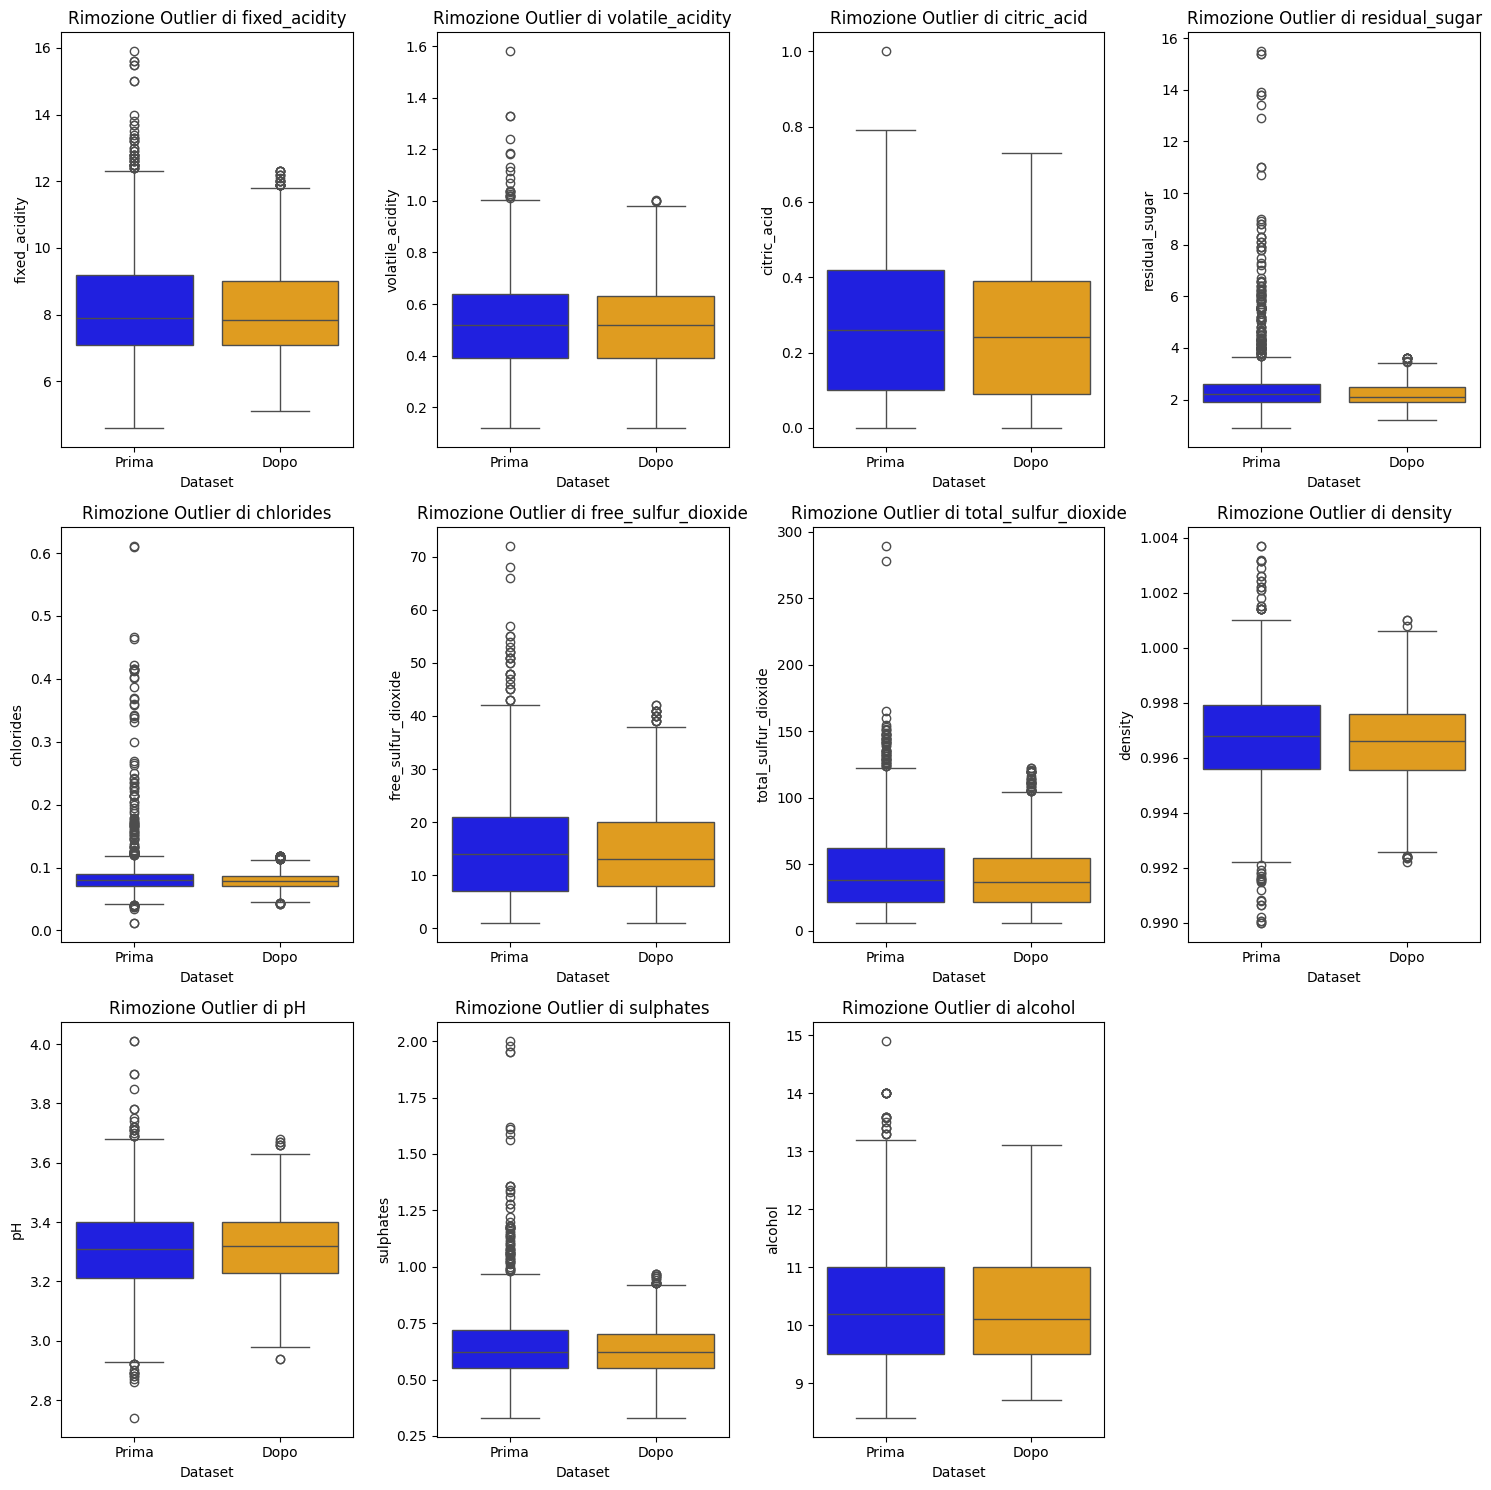

In [80]:
plot_boxplots_comparision(data,data_clean_remove)

Accuratezza del modello RandomForestClassifier: 0.690
Accuratezza del classificatore SVM: 0.539
Accuratezza del modello di regressione logistica: 0.5723905723905723
Accuratezza del classificatore ad albero decisionale: 0.582
Accuratezza del classificatore Naive Bayes: 0.498


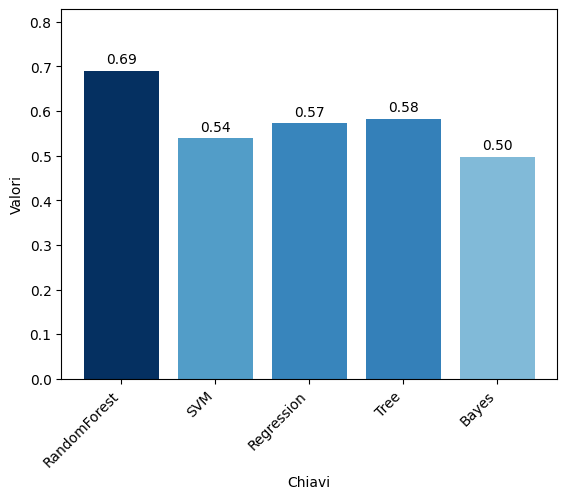

In [81]:
result_all_remove=classificator(data_clean_remove,'quality')
plot_bar_chart(result_all_remove)

In [82]:
relevant_clean_remove=remove_outliers(relevant)
print(relevant_clean_remove.shape)

(1496, 5)


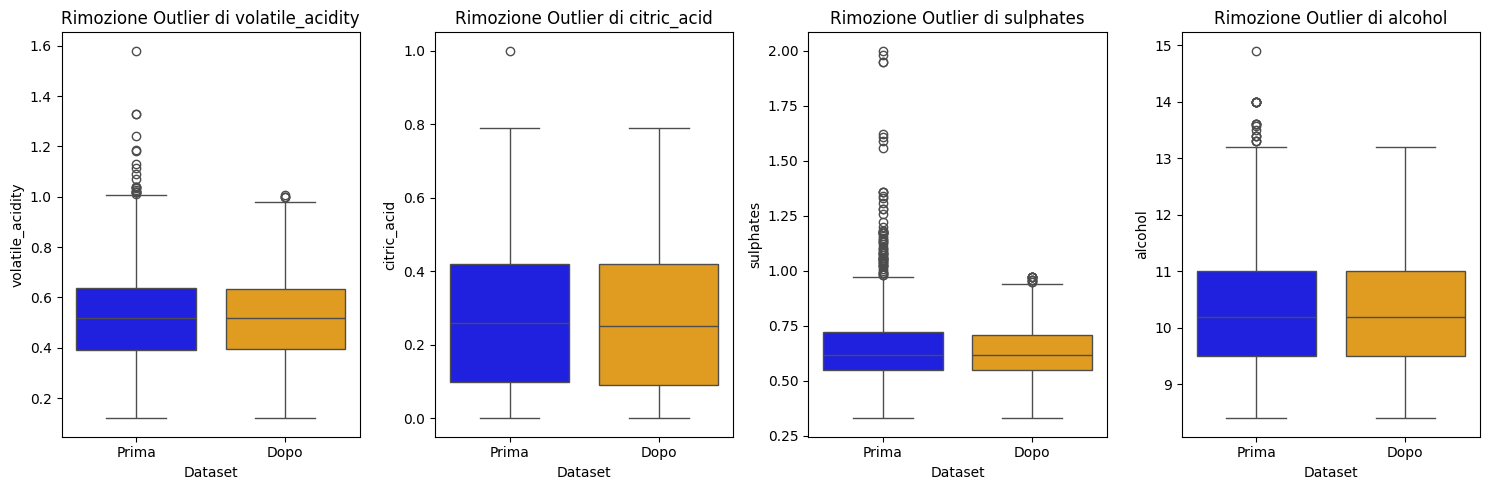

In [83]:
plot_boxplots_comparision(relevant,relevant_clean_remove)

Accuratezza del modello RandomForestClassifier: 0.693
Accuratezza del classificatore SVM: 0.575
Accuratezza del modello di regressione logistica: 0.6283422459893048
Accuratezza del classificatore ad albero decisionale: 0.602
Accuratezza del classificatore Naive Bayes: 0.599


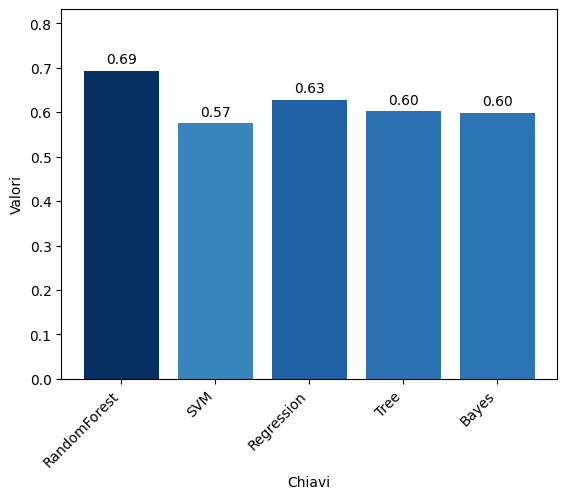

In [84]:
result_relevant_remove=classificator(relevant_clean_remove, 'quality')
plot_bar_chart(result_relevant_remove)

Nuovo approccio: riduzione dei tipi di quality  (3-4=0,5-6=1,7-8=2)

In [85]:
new_data=new_quality_value(data)

In [86]:
data_clean_new=replace_outliers_with_median(new_data)
data_clean_new.shape

(1599, 12)

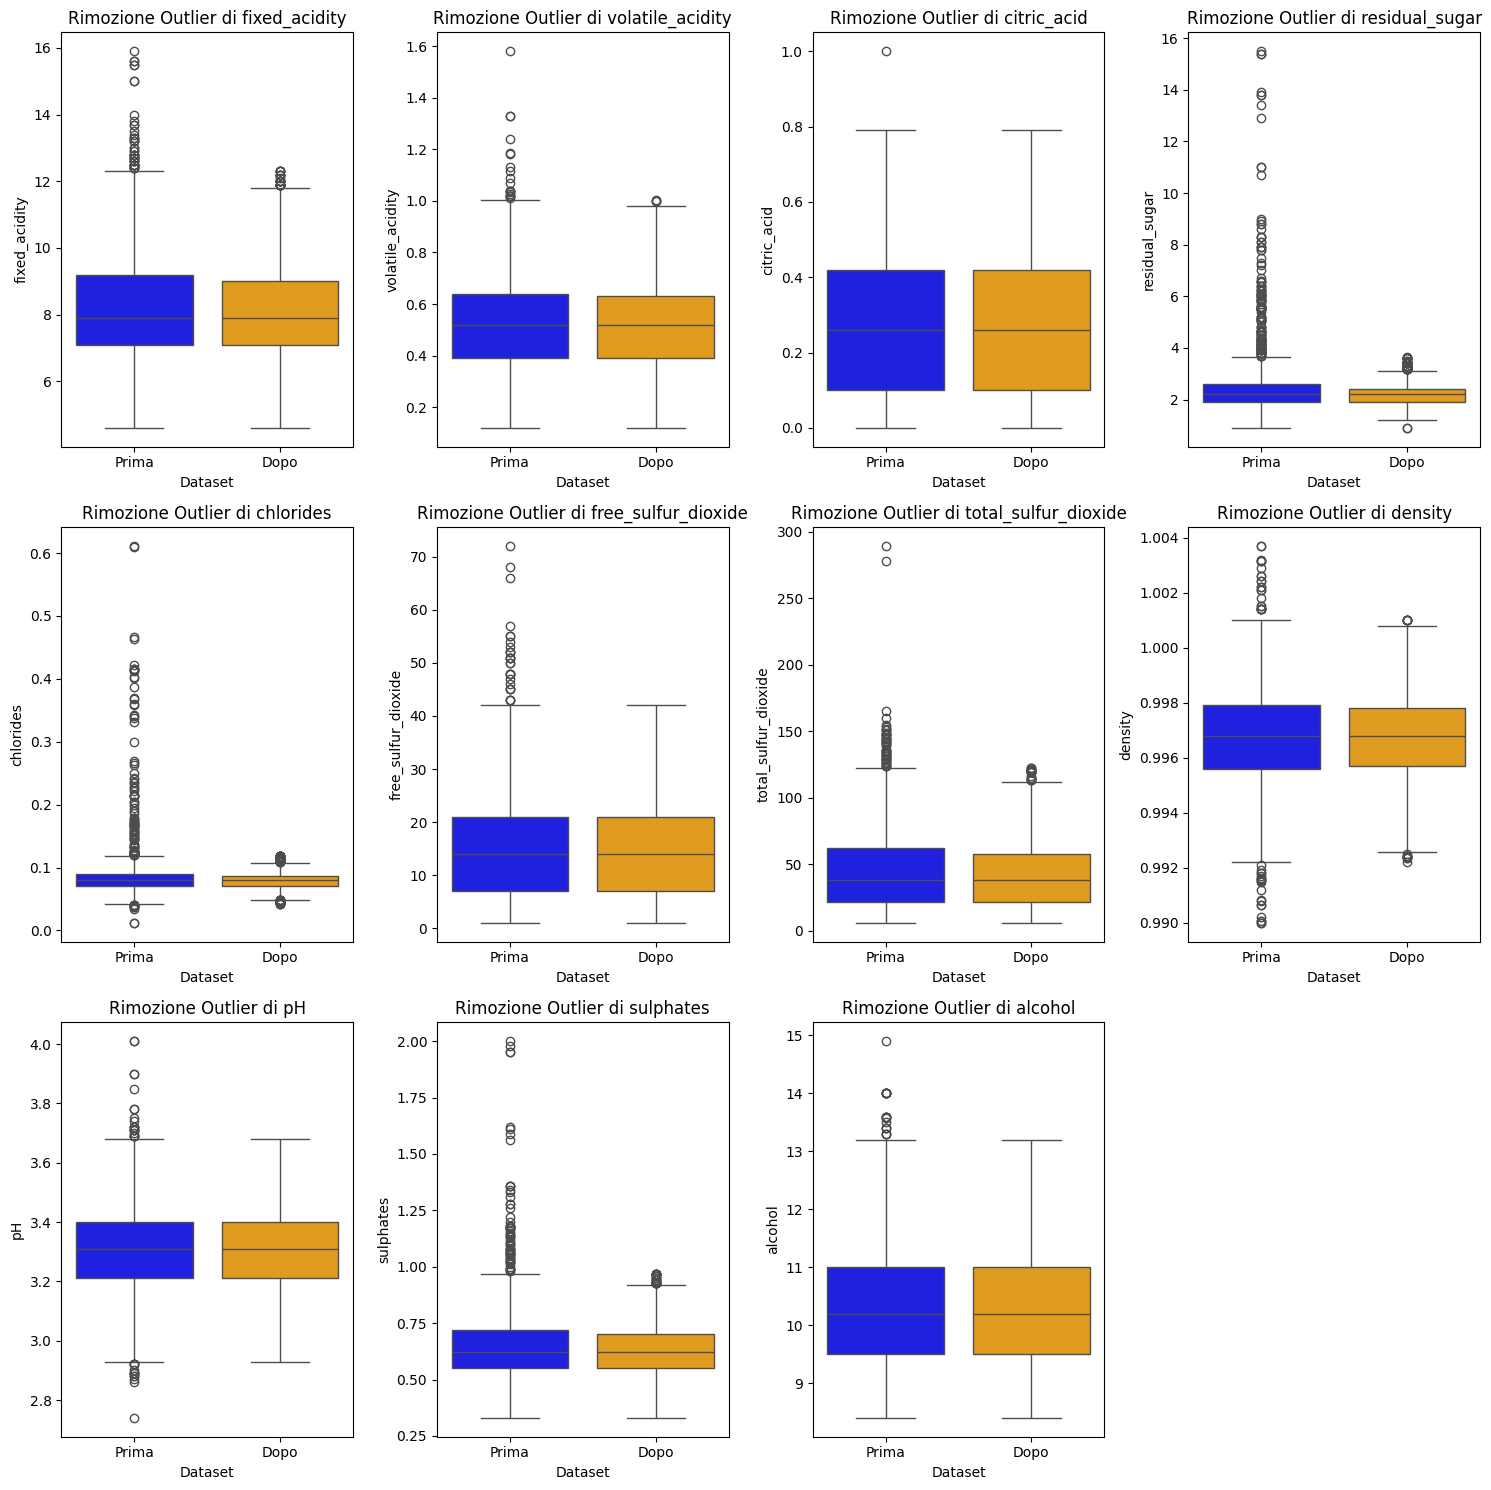

In [94]:
plot_boxplots_comparision(new_data,data_clean_new)

Accuratezza del modello RandomForestClassifier: 0.850
Accuratezza del classificatore SVM: 0.810
Accuratezza del modello di regressione logistica: 0.83
Accuratezza del classificatore ad albero decisionale: 0.797
Accuratezza del classificatore Naive Bayes: 0.777


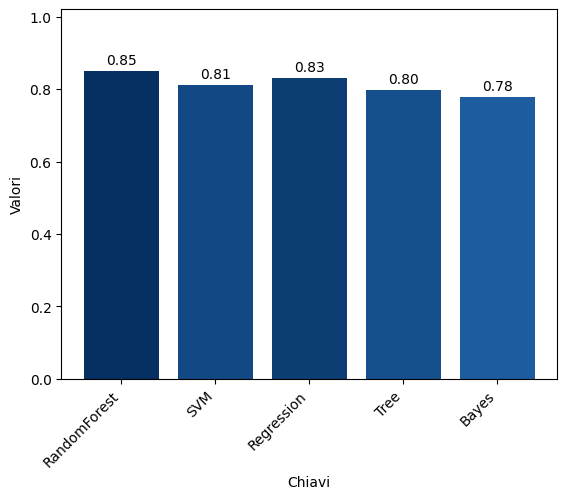

In [87]:
result_data_clean_new=classificator(data_clean_new,'quality')
plot_bar_chart(result_data_clean_new)

In [96]:
relevant_new=new_data.drop(columns=['fixed_acidity','residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH'])
relevant_clean_new=replace_outliers_with_median(relevant_new)
relevant_clean_new.shape

(1599, 5)

Accuratezza del modello RandomForestClassifier: 0.853
Accuratezza del classificatore SVM: 0.810
Accuratezza del modello di regressione logistica: 0.8325
Accuratezza del classificatore ad albero decisionale: 0.790
Accuratezza del classificatore Naive Bayes: 0.818


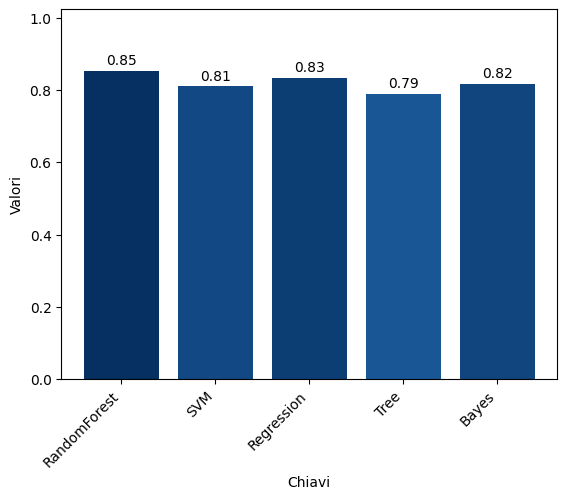

In [89]:
result_relevant_clean_new=classificator(relevant_clean_new,'quality')
plot_bar_chart(result_relevant_clean_new)

In [90]:
data_clean_new_remove=remove_outliers(new_data)
data_clean_new_remove.shape

(1188, 12)

Accuratezza del modello RandomForestClassifier: 0.869
Accuratezza del classificatore SVM: 0.852
Accuratezza del modello di regressione logistica: 0.8417508417508418
Accuratezza del classificatore ad albero decisionale: 0.828
Accuratezza del classificatore Naive Bayes: 0.801


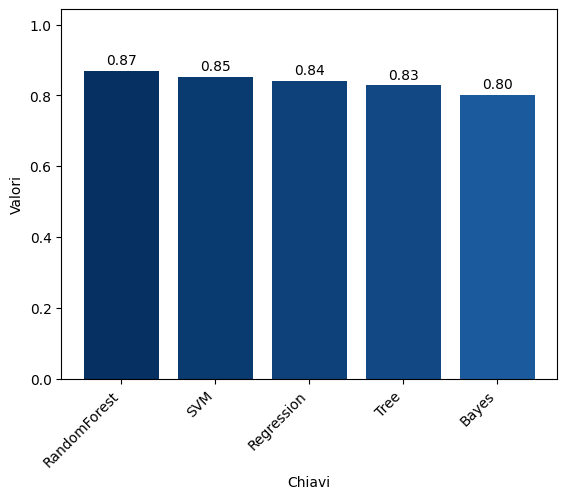

In [91]:
result_data_clean_new_remove=classificator(data_clean_new_remove,'quality')
plot_bar_chart(result_data_clean_new_remove)

In [92]:
relevant_new_remove=new_data.drop(columns=['fixed_acidity','residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH'])
relevant_clean_new_remove=remove_outliers(relevant_new_remove)
relevant_clean_new_remove.shape

(1496, 5)

Accuratezza del modello RandomForestClassifier: 0.856
Accuratezza del classificatore SVM: 0.826
Accuratezza del modello di regressione logistica: 0.839572192513369
Accuratezza del classificatore ad albero decisionale: 0.805
Accuratezza del classificatore Naive Bayes: 0.832


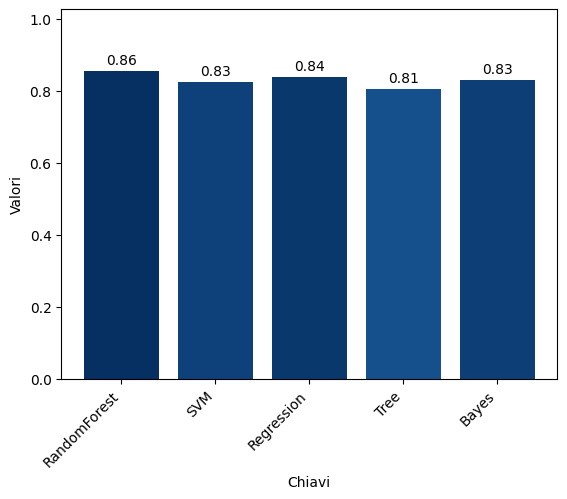

In [93]:
result_relevant_clean_new_remove=classificator(relevant_clean_new_remove,'quality')
plot_bar_chart(result_relevant_clean_new_remove)